In [1]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train (4).csv')
test=pd.read_csv('test (3).csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Convert dataframe into numpy array

In [6]:
Y=train.iloc[:,0:1].values
X=train.iloc[:,1:].values

In [7]:
X.shape

(42000, 784)

In [8]:
Y.shape

(42000, 1)

In [9]:
X_test=test.values

In [13]:
#Normalize Inputs

In [14]:
min_input=0
max_input=255
X_train=X/255
X_test=X_test/255

In [15]:
###Reshape the input (batch size,height,width,number of color channels)

In [18]:
X_train=X_train.reshape([-1,28,28,1])

In [19]:
X_test=X_test.reshape([-1,28,28,1])


In [20]:
X_train.shape

(42000, 28, 28, 1)

In [21]:
from keras.utils import to_categorical

In [22]:
Y=to_categorical(Y,10)
Y.shape

(42000, 10)

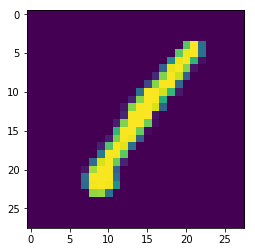

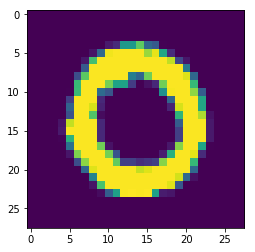

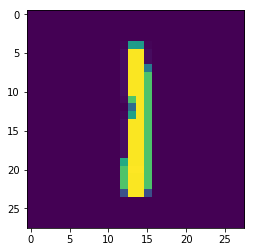

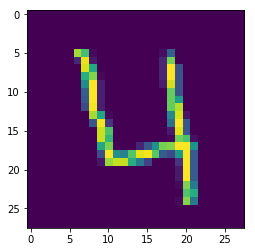

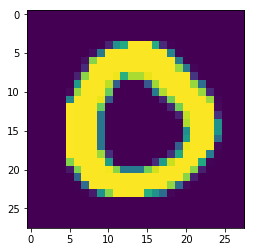

In [23]:
for i in range(5):
    plt.imshow(X_train[i].reshape(28,28))
    plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_t,X_val,Y_t,Y_val=train_test_split(X_train,Y,test_size=0.1)

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [76]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation='softmax'))

In [77]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 64)          0         
__________

In [79]:
#For monitoring validation accuracy

In [80]:
call=ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5,min_lr=0.0001)

In [81]:
#Data augmentation

In [82]:
image_aug = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)


In [83]:
train = image_aug.flow(X_t, Y_t, batch_size=100)
val = image_aug.flow(X_val, Y_val, batch_size=100)

In [84]:
#Train Model

In [85]:
model.fit_generator(train,epochs=30,steps_per_epoch=100,verbose=2,validation_data=val,callbacks=[call])

Epoch 1/30
 - 540s - loss: 1.3742 - acc: 0.5249 - val_loss: 0.5624 - val_acc: 0.8326
Epoch 2/30
 - 523s - loss: 0.5538 - acc: 0.8242 - val_loss: 0.2878 - val_acc: 0.9052
Epoch 3/30
 - 523s - loss: 0.3486 - acc: 0.8947 - val_loss: 0.2259 - val_acc: 0.9300
Epoch 4/30
 - 518s - loss: 0.2623 - acc: 0.9205 - val_loss: 0.1803 - val_acc: 0.9445
Epoch 5/30
 - 534s - loss: 0.2257 - acc: 0.9309 - val_loss: 0.1763 - val_acc: 0.9450
Epoch 6/30
 - 540s - loss: 0.2029 - acc: 0.9398 - val_loss: 0.1584 - val_acc: 0.9555
Epoch 7/30
 - 505s - loss: 0.1935 - acc: 0.9446 - val_loss: 0.1139 - val_acc: 0.9681
Epoch 8/30
 - 497s - loss: 0.1575 - acc: 0.9579 - val_loss: 0.1349 - val_acc: 0.9626
Epoch 9/30
 - 497s - loss: 0.1611 - acc: 0.9564 - val_loss: 0.0944 - val_acc: 0.9743
Epoch 10/30
 - 500s - loss: 0.1547 - acc: 0.9570 - val_loss: 0.1258 - val_acc: 0.9629
Epoch 11/30
 - 497s - loss: 0.1326 - acc: 0.9633 - val_loss: 0.0819 - val_acc: 0.9779
Epoch 12/30
 - 490s - loss: 0.1464 - acc: 0.9583 - val_loss: 0.

In [86]:
result = model.predict(X_test)


result = np.argmax(result, axis = 1)
result = pd.Series(result,name="Label")

result = pd.concat([pd.Series(range(1,28001),name = "ImageId"),result],axis = 1)

result.to_csv("mnist.csv",index=False)
